# 📋 Table of Contents
* [Import and first glance](#import)
* [Basic EDA](#eda)
* [Data Cleaning](#clean)
* [Target](#target)
* [Gradient Boosting Model](#model)
* [Linear Model](#linear)

In [10]:
# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats

# ML tools
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator, H2OGradientBoostingEstimator

In [11]:
# configs
pd.set_option('display.max_columns', None) # we want to display all columns in this notebook

# random seed
my_random_seed = 12345

# aesthetics
default_color_1 = 'darkblue'
default_color_2 = 'darkgreen'
default_color_3 = 'darkred'

<a id='import'></a>
# Import and First Glance

In [12]:
# load data
df_train = pd.read_csv('input/exploring-predictive-health-factors/train.csv',
                       low_memory=False)
df_test = pd.read_csv('input/exploring-predictive-health-factors/test.csv',
                      low_memory=False)
df_sub = pd.read_csv('input/exploring-predictive-health-factors/sample_submission.csv')

# original file
df_orig = pd.read_csv('input/diet-exercise-and-pcos-insights/Cleaned-Data.csv')

In [13]:
# preview
df_train.head(10)

,ID,Age,Weight_kg,PCOS,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Exercise_Benefit
0,0,20-25,64.0,No,No,No,No,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,Somewhat
1,1,15-20,55.0,No,No,No,No,No,No,6-8 Times a Week,No Exercise,Less than 30 minutes,6-8 hours,Somewhat
2,2,15-20,91.0,No,No,No,Yes,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Somewhat
3,3,15-20,56.0,No,No,No,No,No,No,6-8 Times a Week,"Cardio (e.g., running, cycling, swimming)",45 minutes,6-8 hours,Not at All
4,4,15-20,47.0,No,Yes,No,No,No,No,Rarely,No Exercise,Not Applicable,6-8 hours,Not Much
5,5,20-25,41.0,No,Yes,No,Yes,No,No,Never,No Exercise,Not Applicable,Less than 6 hours,Somewhat
6,6,15-20,58.0,No,No,No,No,No,No,1-2 Times a Week,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,Somewhat
7,7,20-25,85.0,Yes,Yes,Yes,Yes,"Yes, diagnosed by a doctor",Yes,Rarely,No Exercise,Not Applicable,Less than 6 hours,Somewhat
8,8,20-25,71.0,Yes,Yes,No,No,No,No,Never,No Exercise,Not Applicable,Less than 6 hours,Not at All
9,9,20-25,62.0,No,No,No,No,No,No,Rarely,No Exercise,Less than 30 minutes,Less than 6 hours,Somewhat


In [14]:
# structure of data - train
df_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     210 non-null    int64  
 1   Age                    209 non-null    object 
 2   Weight_kg              208 non-null    float64
 3   PCOS                   210 non-null    object 
 4   Hormonal_Imbalance     208 non-null    object 
 5   Hyperandrogenism       207 non-null    object 
 6   Hirsutism              205 non-null    object 
 7   Conception_Difficulty  209 non-null    object 
 8   Insulin_Resistance     209 non-null    object 
 9   Exercise_Frequency     208 non-null    object 
 10  Exercise_Type          208 non-null    object 
 11  Exercise_Duration      208 non-null    object 
 12  Sleep_Hours            208 non-null    object 
 13  Exercise_Benefit       209 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 23.1+ KB

#### 💡 Very small dataset! And a few missing values.

In [15]:
# structure of data - test
df_test.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     145 non-null    int64  
 1   Age                    144 non-null    object 
 2   Weight_kg              143 non-null    float64
 3   Hormonal_Imbalance     142 non-null    object 
 4   Hyperandrogenism       144 non-null    object 
 5   Hirsutism              143 non-null    object 
 6   Conception_Difficulty  143 non-null    object 
 7   Insulin_Resistance     144 non-null    object 
 8   Exercise_Frequency     144 non-null    object 
 9   Exercise_Type          144 non-null    object 
 10  Exercise_Duration      145 non-null    object 
 11  Sleep_Hours            144 non-null    object 
 12  Exercise_Benefit       144 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 14.9+ KB


In [16]:
# original file - for comparison
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         173 non-null    object 
 1   Weight_kg                   173 non-null    float64
 2   Height_ft                   173 non-null    float64
 3   Marital_Status              173 non-null    object 
 4   PCOS                        173 non-null    object 
 5   Family_History_PCOS         173 non-null    object 
 6   Menstrual_Irregularity      173 non-null    object 
 7   Hormonal_Imbalance          173 non-null    object 
 8   Hyperandrogenism            173 non-null    object 
 9   Hirsutism                   173 non-null    object 
 10  Mental_Health               173 non-null    object 
 11  Conception_Difficulty       173 non-null    object 
 12  Insulin_Resistance          173 non-null    object 
 13  Diabetes                    173 non

<a id='eda'></a>
# Basic EDA

In [17]:
# basic stats - train
df_train.describe(include='all')

,ID,Age,Weight_kg,PCOS,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Exercise_Benefit
count,210.000000,209,208.000000,210,208,207,205,209,209,208,208,208,208,209
unique,NaN,10,NaN,2,4,2,3,4,3,8,16,8,5,4
top,NaN,20-25,NaN,No,Yes,No,No,No,No,Rarely,No Exercise,Not Applicable,6-8 hours,Somewhat
freq,NaN,125,NaN,164,111,175,148,201,185,102,90,86,135,137
mean,104.500000,NaN,56.159615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,60.765944,NaN,12.572768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,52.250000,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,104.500000,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,156.750000,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# basic stats - test
df_test.describe(include='all')

,ID,Age,Weight_kg,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Exercise_Benefit
count,145.000000,144,143.000000,142,144,143,143,144,144,144,145,144,144
unique,NaN,13,NaN,2,2,2,3,3,12,11,12,7,4
top,NaN,20-25,NaN,Yes,No,No,No,No,Rarely,Cardio (e.g.,Not Applicable,6-8 hours,Somewhat
freq,NaN,95,NaN,79,128,113,137,126,82,65,58,100,102
mean,72.000000,NaN,56.125874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,42.001984,NaN,11.291819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,36.000000,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,72.000000,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,108.000000,NaN,64.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# define features and target
features_num = ['Weight_kg']

features_cat = ['Age','Hormonal_Imbalance', 'Hyperandrogenism', 'Hirsutism',
                'Conception_Difficulty', 'Insulin_Resistance',
                'Exercise_Frequency', 'Exercise_Type', 'Exercise_Duration',
                'Sleep_Hours', 'Exercise_Benefit']

target = 'PCOS'

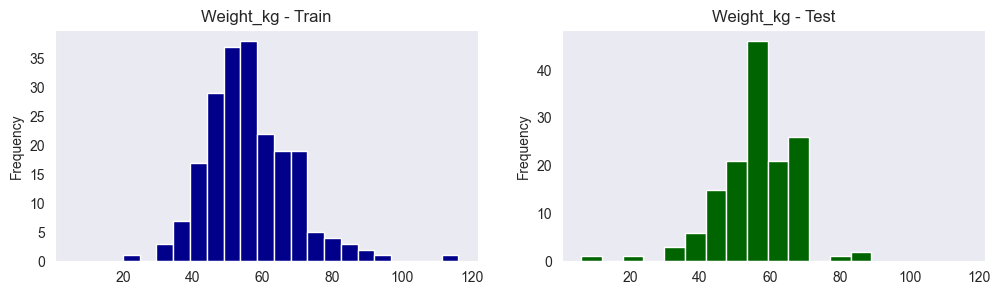

In [20]:
# plot histograms (train and test)
for f in features_num:
    plt.figure(figsize=(12,3))
    ax1 = plt.subplot(1,2,1)
    df_train[f].plot(kind='hist', bins=20, color=default_color_1)
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    df_test[f].plot(kind='hist', bins=14, color=default_color_2)
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

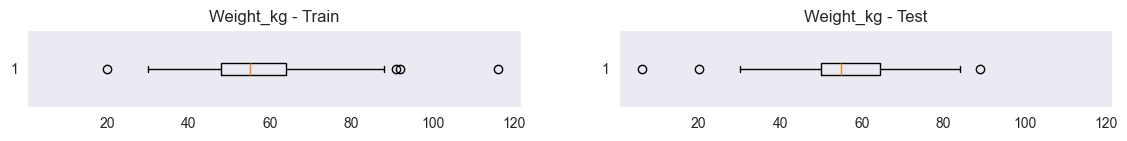

In [21]:
# boxplots (train and test)
for f in features_num:
    plt.figure(figsize=(14,1))
    ax1 = plt.subplot(1,2,1)
    df_temp = df_train[f].dropna() # boxplot does not like missings...
    plt.boxplot(df_temp, vert=False)
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    df_temp = df_test[f].dropna()
    plt.boxplot(df_temp, vert=False)
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

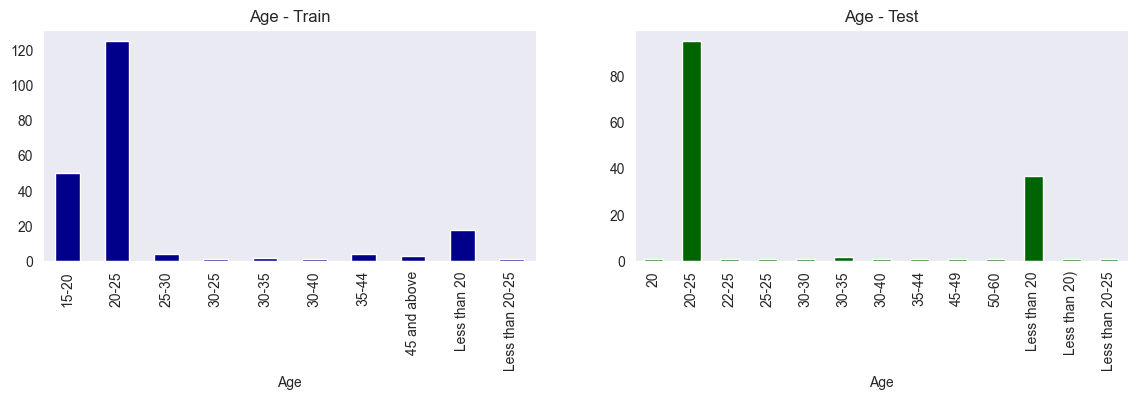

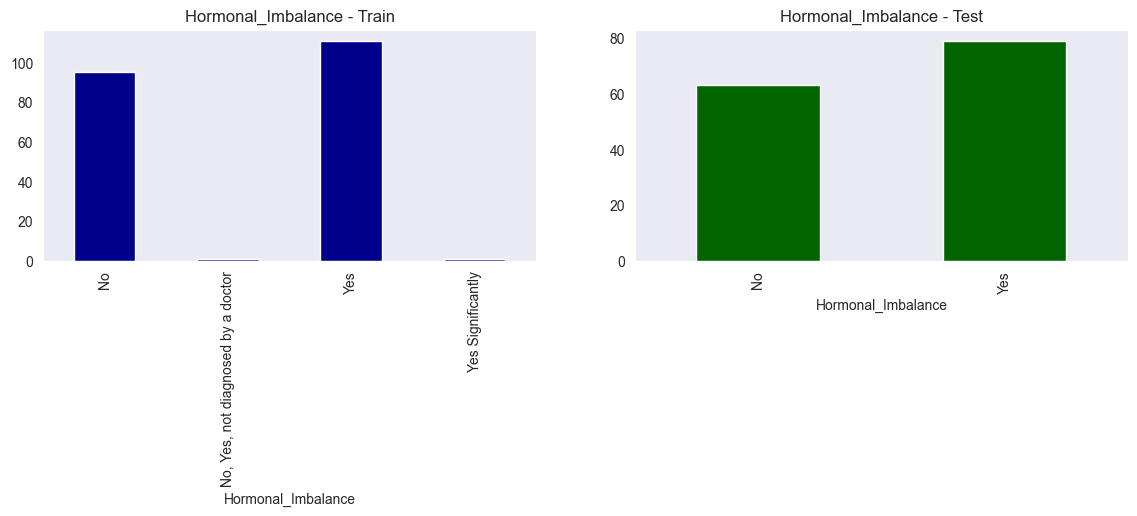

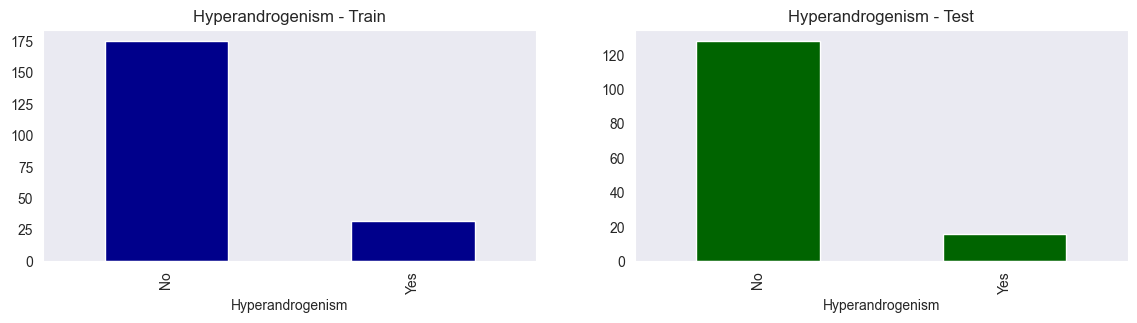

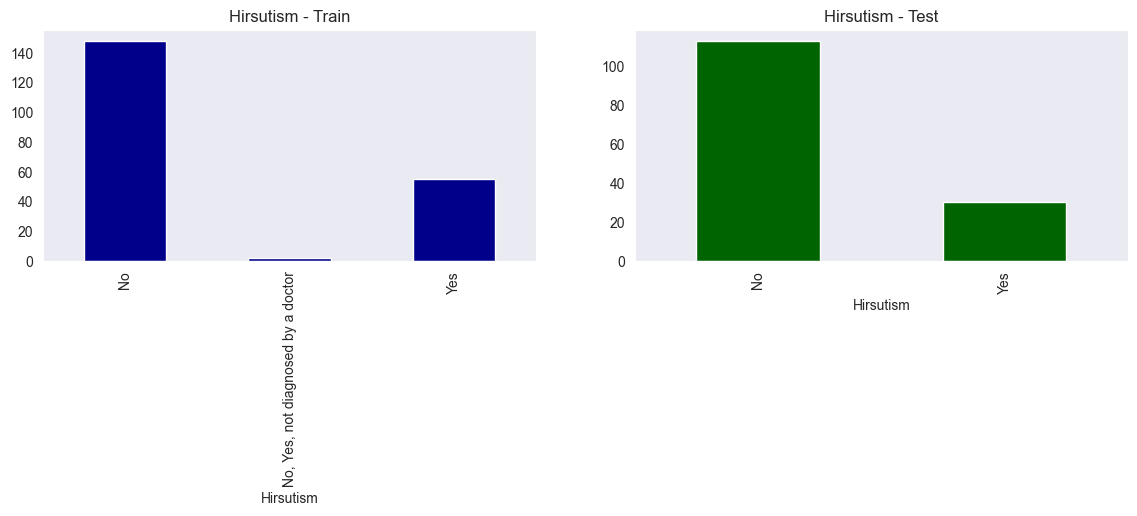

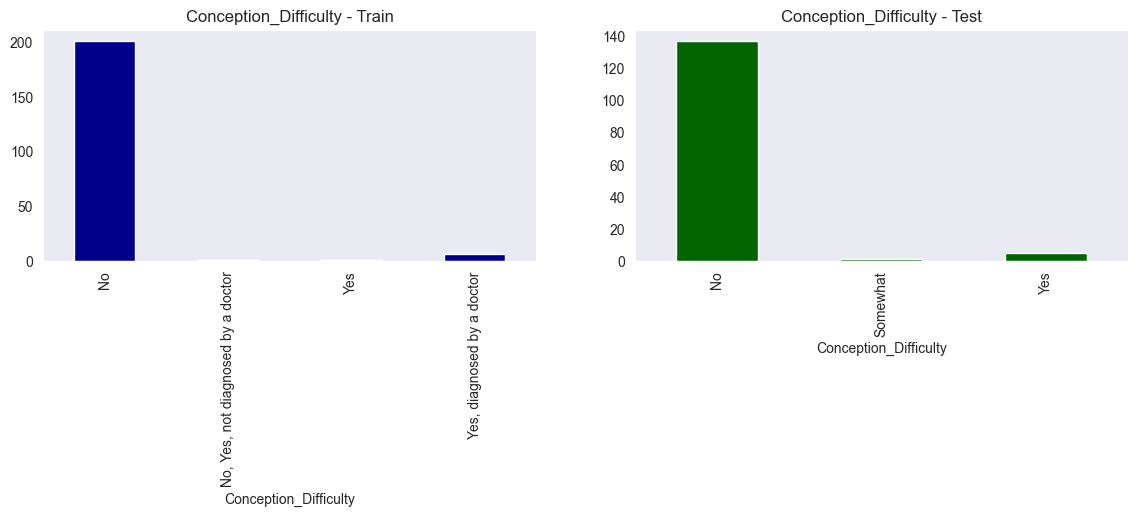

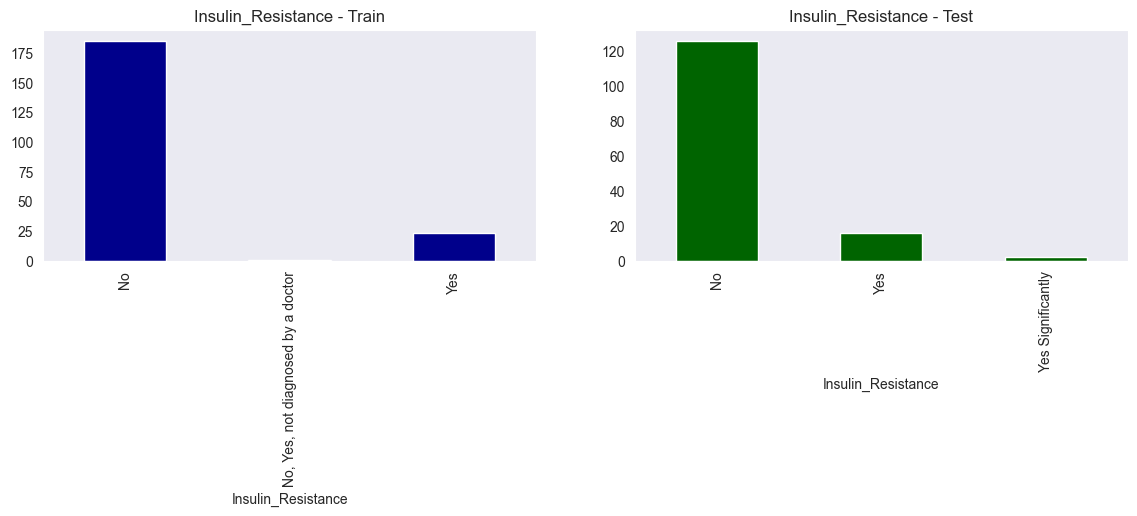

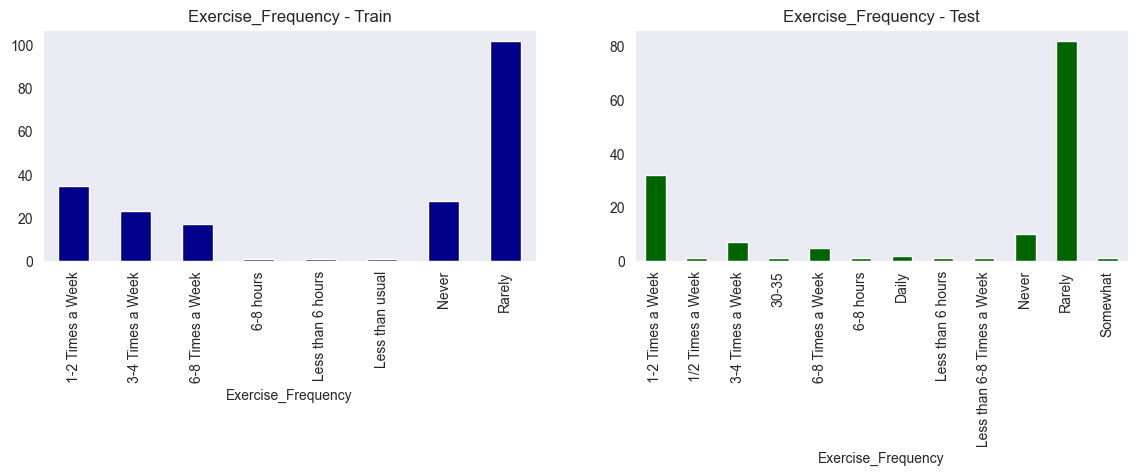

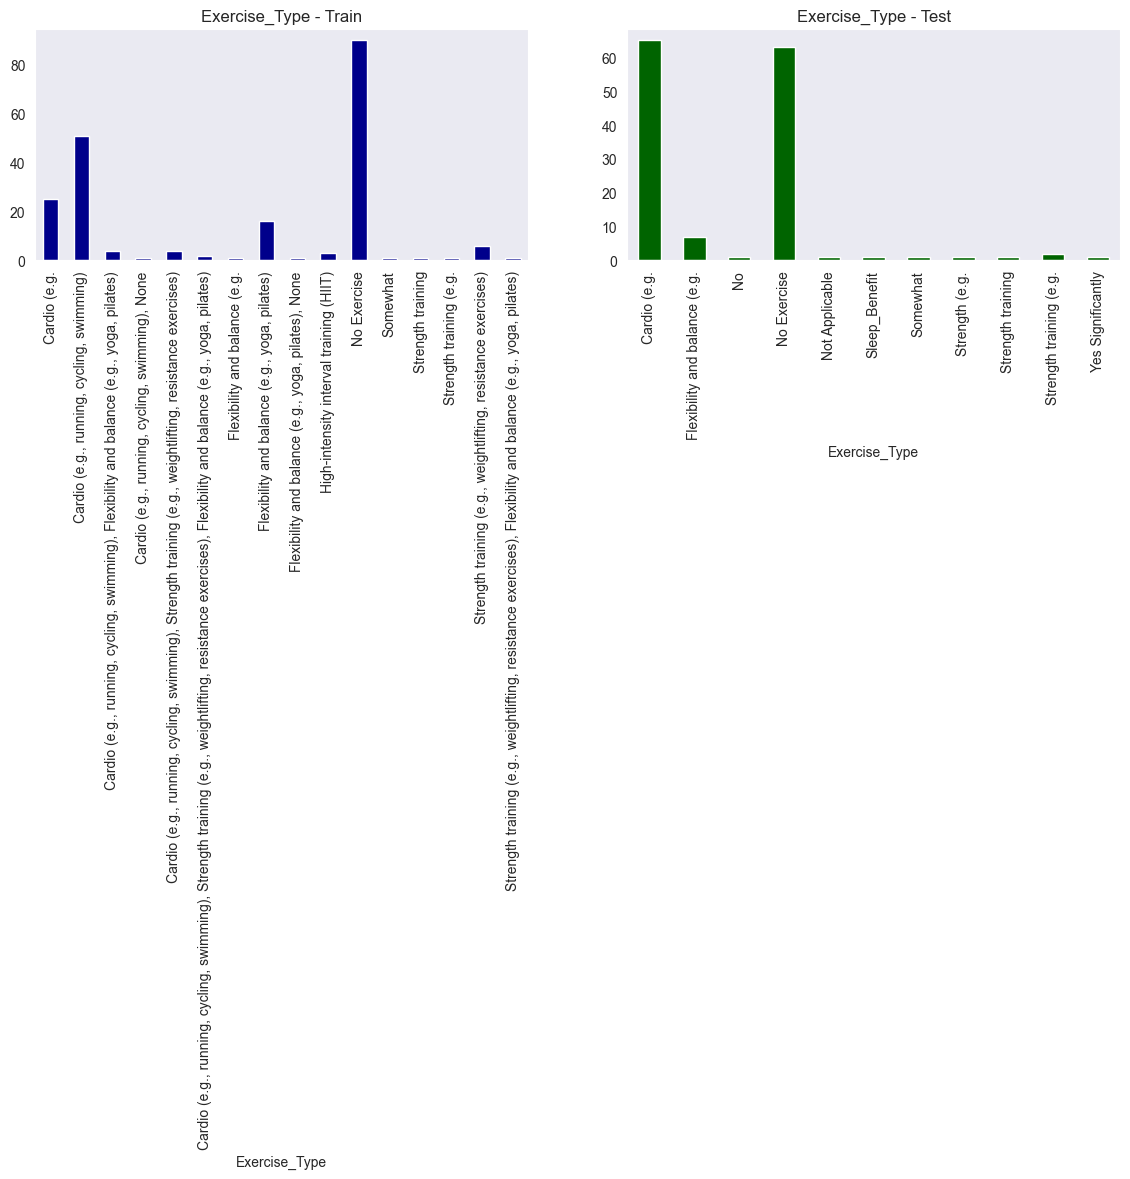

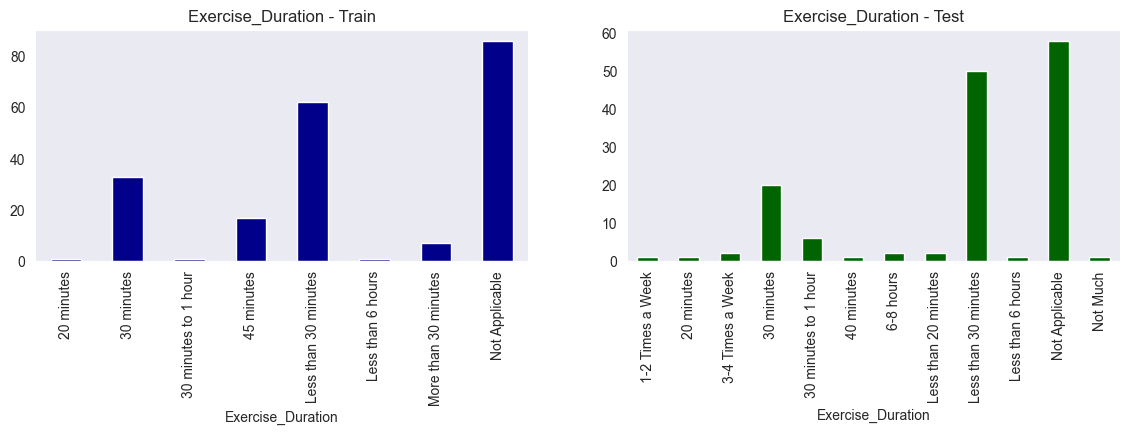

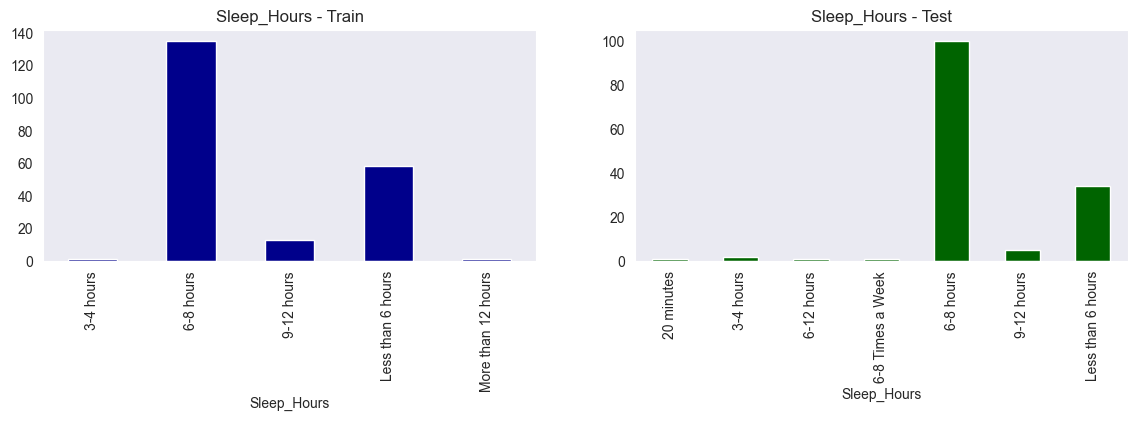

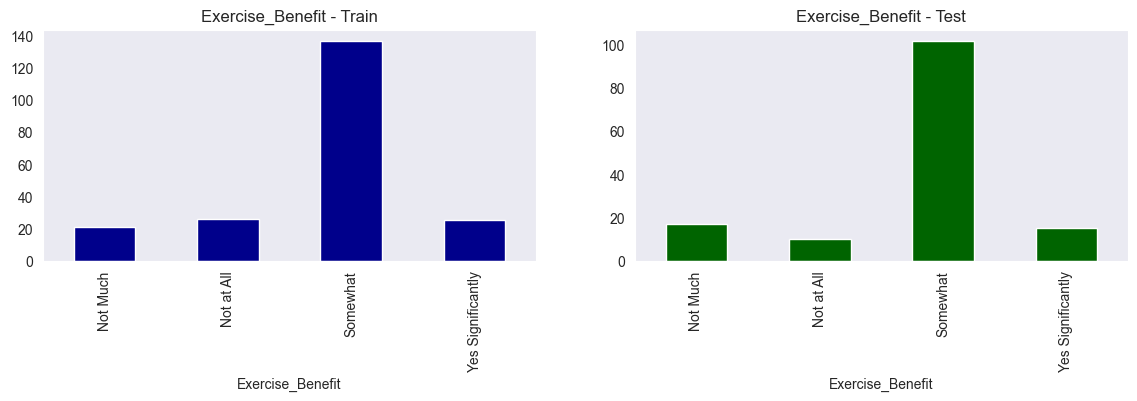

In [22]:
# plot categorical feature distributions (train and test)
for f in features_cat:
    plt.figure(figsize=(14,3))
    ax1 = plt.subplot(1,2,1)
    df_train[f].value_counts().sort_index().plot(kind='bar', color=default_color_1)
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2)
    df_test[f].value_counts().sort_index().plot(kind='bar', color=default_color_2)
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

<a id='clean'></a>
# Data cleaning

#### 💡 Age values need some cleaning...

In [23]:
# check categories of Age in train set
df_train.Age.value_counts()

Age
20-25              125
15-20               50
Less than 20        18
25-30                4
35-44                4
45 and above         3
30-35                2
30-25                1
30-40                1
Less than 20-25      1
Name: count, dtype: int64

In [24]:
# simplify age structure - training data
df_train['Age_Group'] = 'MISSING'
# 20-25
df_train.loc[df_train.Age=='20-25', 'Age_Group'] = '20-25'
# translate all that are < 20 in level "lt20"
df_train.loc[df_train.Age=='15-20', 'Age_Group'] = 'lt20'
df_train.loc[df_train.Age=='Less than 20', 'Age_Group'] = 'lt20'
df_train.loc[df_train.Age=='Less than 20-25', 'Age_Group'] = 'lt20'
# translate all that are > 25 in level "gt25"
df_train.loc[df_train.Age=='35-44', 'Age_Group'] = 'gt25'
df_train.loc[df_train.Age=='25-30', 'Age_Group'] = 'gt25'
df_train.loc[df_train.Age=='45 and above', 'Age_Group'] = 'gt25'
df_train.loc[df_train.Age=='30-35', 'Age_Group'] = 'gt25'
df_train.loc[df_train.Age=='30-25', 'Age_Group'] = 'gt25'
df_train.loc[df_train.Age=='30-40', 'Age_Group'] = 'gt25'
# check results
df_train['Age_Group'].value_counts()

Age_Group
20-25      125
lt20        69
gt25        15
MISSING      1
Name: count, dtype: int64

In [25]:
# check categories of Age in test set
df_test.Age.value_counts()

Age
20-25              95
Less than 20       37
30-35               2
Less than 20-25     1
35-44               1
30-30               1
Less than 20)       1
25-25               1
50-60               1
22-25               1
20                  1
30-40               1
45-49               1
Name: count, dtype: int64

In [26]:
# simplify age structure - test data
df_test['Age_Group'] = 'MISSING'
# 20-25
df_test.loc[df_test.Age=='20-25', 'Age_Group'] = '20-25'
df_test.loc[df_test.Age=='20', 'Age_Group'] = '20-25'
df_test.loc[df_test.Age=='22-25', 'Age_Group'] = '20-25'
df_test.loc[df_test.Age=='25-25', 'Age_Group'] = '20-25'
# translate all that are < 20 in level "lt20"
df_test.loc[df_test.Age=='Less than 20', 'Age_Group'] = 'lt20'
df_test.loc[df_test.Age=='Less than 20-25', 'Age_Group'] = 'lt20'
df_test.loc[df_test.Age=='Less than 20)', 'Age_Group'] = 'lt20'
# translate all that are > 25 in level "gt25"
df_test.loc[df_test.Age=='30-35', 'Age_Group'] = 'gt25'
df_test.loc[df_test.Age=='35-44', 'Age_Group'] = 'gt25'
df_test.loc[df_test.Age=='30-30', 'Age_Group'] = 'gt25'
df_test.loc[df_test.Age=='50-60', 'Age_Group'] = 'gt25'
df_test.loc[df_test.Age=='30-40', 'Age_Group'] = 'gt25'
df_test.loc[df_test.Age=='45-49', 'Age_Group'] = 'gt25'
# check results
df_test['Age_Group'].value_counts()

Age_Group
20-25      98
lt20       39
gt25        7
MISSING     1
Name: count, dtype: int64

#### 💡 Exercise Type are also not yet clean...

In [27]:
# check categories of Exercise_Type in train set
df_train.Exercise_Type.value_counts()

Exercise_Type
No Exercise                                                                                                                                                90
Cardio (e.g., running, cycling, swimming)                                                                                                                  51
Cardio (e.g.                                                                                                                                               25
Flexibility and balance (e.g., yoga, pilates)                                                                                                              16
Strength training (e.g., weightlifting, resistance exercises)                                                                                               6
Cardio (e.g., running, cycling, swimming), Strength training (e.g., weightlifting, resistance exercises)                                                    4
Cardio (e.g., running, cycling, swimmi

In [28]:
# simplify Exercise_Type structure - training data
df_train['Exercise_Type_Clean'] = 'MISSING'

# replace values
df_train.loc[df_train.Exercise_Type=='No Exercise', 'Exercise_Type_Clean'] = 'No Exercise'
df_train.loc[df_train.Exercise_Type=='Cardio (e.g., running, cycling, swimming)', 'Exercise_Type_Clean'] = 'Cardio'
df_train.loc[df_train.Exercise_Type=='Cardio (e.g.', 'Exercise_Type_Clean'] = 'Cardio'
df_train.loc[df_train.Exercise_Type=='Flexibility and balance (e.g., yoga, pilates)', 'Exercise_Type_Clean'] = 'Flexibility'
df_train.loc[df_train.Exercise_Type=='Strength training (e.g., weightlifting, resistance exercises)', 'Exercise_Type_Clean'] = 'Strength'
df_train.loc[df_train.Exercise_Type=='Cardio (e.g., running, cycling, swimming), Strength training (e.g., weightlifting, resistance exercises)', 'Exercise_Type_Clean'] = 'Flexibility+Strength'
df_train.loc[df_train.Exercise_Type=='Cardio (e.g., running, cycling, swimming), Flexibility and balance (e.g., yoga, pilates)', 'Exercise_Type_Clean'] = 'Cardio+Flexibility'
df_train.loc[df_train.Exercise_Type=='High-intensity interval training (HIIT)', 'Exercise_Type_Clean'] = 'HIIT'
df_train.loc[df_train.Exercise_Type=='Cardio (e.g., running, cycling, swimming), Strength training (e.g., weightlifting, resistance exercises), Flexibility and balance (e.g., yoga, pilates),', 'Exercise_Type_Clean'] = 'Cardio+Flexibiliy+Strength'
df_train.loc[df_train.Exercise_Type=='Strength training (e.g., weightlifting, resistance exercises), Flexibility and balance (e.g., yoga, pilates)', 'Exercise_Type_Clean'] = 'Strength'
df_train.loc[df_train.Exercise_Type=='Flexibility and balance (e.g., yoga, pilates), None', 'Exercise_Type_Clean'] = 'Flexibility'
df_train.loc[df_train.Exercise_Type=='Cardio (e.g., running, cycling, swimming), None', 'Exercise_Type_Clean'] = 'Cardio'
df_train.loc[df_train.Exercise_Type=='Strength training', 'Exercise_Type_Clean'] = 'Strength'
df_train.loc[df_train.Exercise_Type=='Strength training (e.g.', 'Exercise_Type_Clean'] = 'Strength'
df_train.loc[df_train.Exercise_Type=='Somewhat', 'Exercise_Type_Clean'] = 'Somewhat'
df_train.loc[df_train.Exercise_Type=='Flexibility and balance (e.g.', 'Exercise_Type_Clean'] = 'Flexibility'
     
# check results
df_train['Exercise_Type_Clean'].value_counts()

Exercise_Type_Clean
No Exercise             90
Cardio                  77
Flexibility             18
Strength                 9
Flexibility+Strength     4
MISSING                  4
Cardio+Flexibility       4
HIIT                     3
Somewhat                 1
Name: count, dtype: int64

In [29]:
# check categories of Exercise_Type in test set
df_test.Exercise_Type.value_counts()

Exercise_Type
Cardio (e.g.                     65
No Exercise                      63
Flexibility and balance (e.g.     7
Strength training (e.g.           2
Strength training                 1
Yes Significantly                 1
No                                1
Sleep_Benefit                     1
Not Applicable                    1
Somewhat                          1
Strength (e.g.                    1
Name: count, dtype: int64

In [30]:
# simplify Exercise_Type structure - test data
df_test['Exercise_Type_Clean'] = 'MISSING'

# replace values
df_test.loc[df_test.Exercise_Type=='Cardio (e.g.', 'Exercise_Type_Clean'] = 'Cardio'
df_test.loc[df_test.Exercise_Type=='No Exercise', 'Exercise_Type_Clean'] = 'No Exercise'
df_test.loc[df_test.Exercise_Type=='Flexibility and balance (e.g.', 'Exercise_Type_Clean'] = 'Flexibility'
df_test.loc[df_test.Exercise_Type=='Strength training (e.g.', 'Exercise_Type_Clean'] = 'Strength'
df_test.loc[df_test.Exercise_Type=='Strength training', 'Exercise_Type_Clean'] = 'Strength'
df_test.loc[df_test.Exercise_Type=='Yes Significantly', 'Exercise_Type_Clean'] = 'Other'
df_test.loc[df_test.Exercise_Type=='No', 'Exercise_Type_Clean'] = 'No Exercise'
df_test.loc[df_test.Exercise_Type=='Sleep_Benefit', 'Exercise_Type_Clean'] = 'MISSING'
df_test.loc[df_test.Exercise_Type=='Not Applicable', 'Exercise_Type_Clean'] = 'MISSING'
df_test.loc[df_test.Exercise_Type=='Somewhat', 'Exercise_Type_Clean'] = 'Somewhat'
df_test.loc[df_test.Exercise_Type=='Strength (e.g.', 'Exercise_Type_Clean'] = 'Strength'
# check results
df_test['Exercise_Type_Clean'].value_counts()

Exercise_Type_Clean
Cardio         65
No Exercise    64
Flexibility     7
Strength        4
MISSING         3
Other           1
Somewhat        1
Name: count, dtype: int64

In [31]:
# replace original features by cleaned ones
features_cat = features_cat + ['Age_Group', 'Exercise_Type_Clean']
features_cat.remove('Age')
features_cat.remove('Exercise_Type')

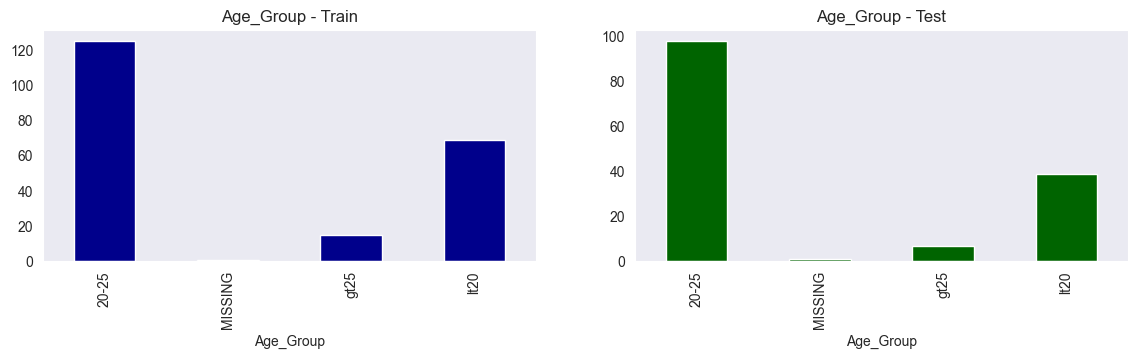

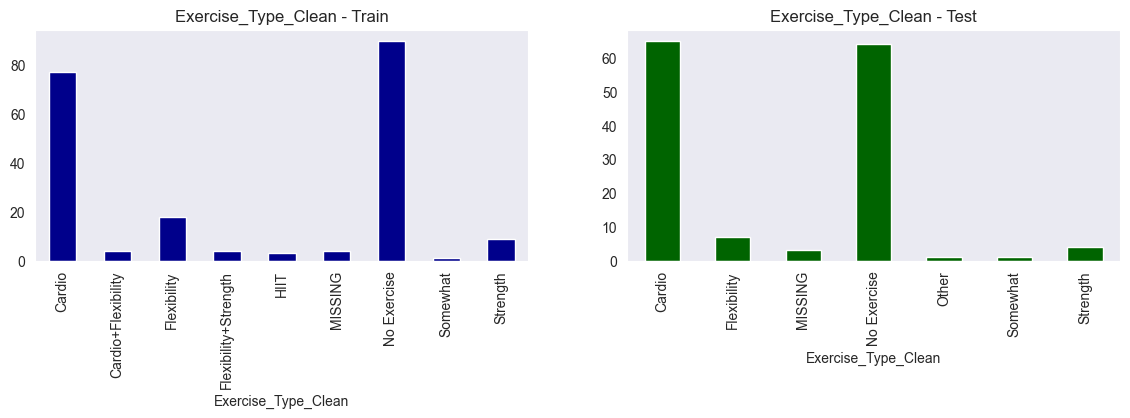

In [32]:
# plot new categorical features (train and test)
for f in ['Age_Group', 'Exercise_Type_Clean']:
    plt.figure(figsize=(14,3))
    ax1 = plt.subplot(1,2,1)
    df_train[f].value_counts().sort_index().plot(kind='bar', color=default_color_1)
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2)
    df_test[f].value_counts().sort_index().plot(kind='bar', color=default_color_2)
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

In [33]:
# export prepared data
df_train.to_csv('train_prep.csv', index=False)
df_test.to_csv('test_prep.csv', index=False)

<a id='target'></a>
# Target

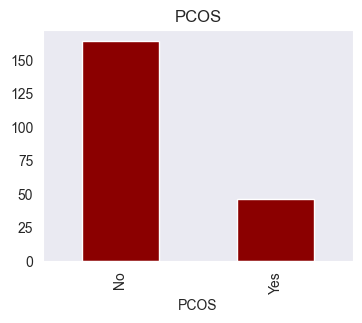

In [34]:
plt.figure(figsize=(4,3))
df_train[target].value_counts().plot(kind='bar', color=default_color_3)
plt.title(target)
plt.grid()
plt.show()

In [35]:
# show values
df_train[target].value_counts()

PCOS
No     164
Yes     46
Name: count, dtype: int64

### Target vs Features:

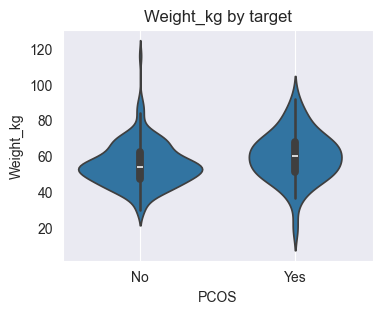

In [36]:
for f in features_num:
    plt.figure(figsize=(4,3))
    sns.violinplot(df_train, x=target, y=f,)
    plt.title(f + ' by target')
    plt.grid()
    plt.show()

#### 💡 It looks like weight has quite an impact on the target.

>>> Feature: Hormonal_Imbalance


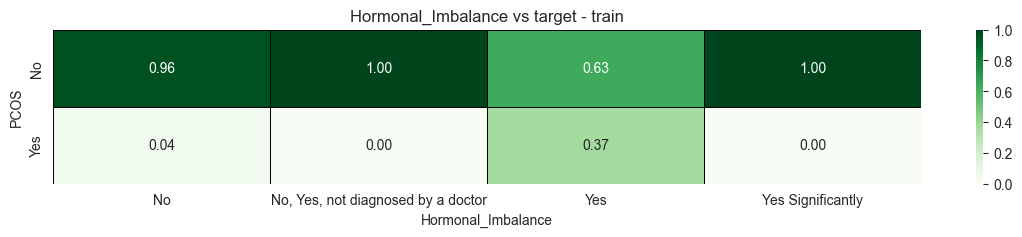

>>> Feature: Hyperandrogenism


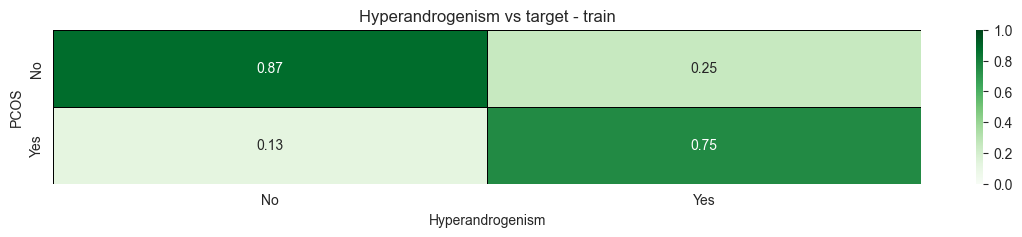

>>> Feature: Hirsutism


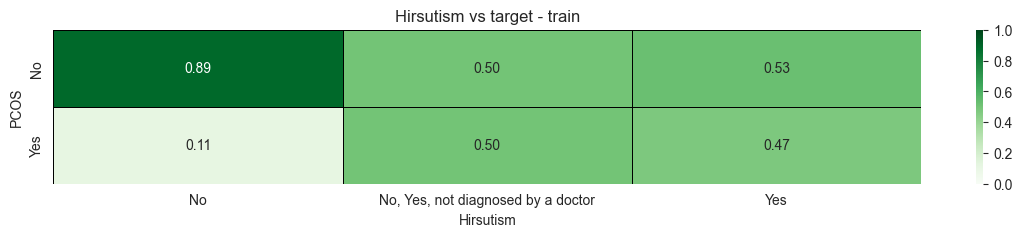

>>> Feature: Conception_Difficulty


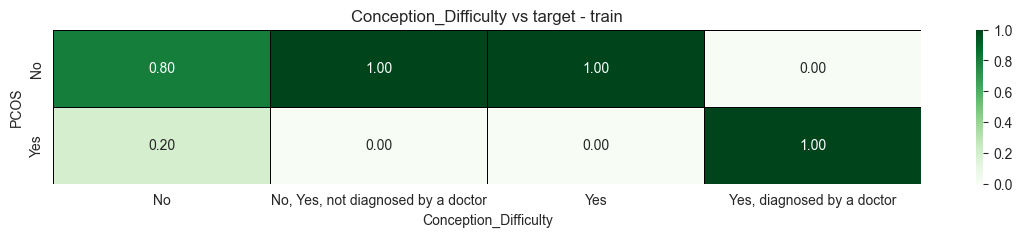

>>> Feature: Insulin_Resistance


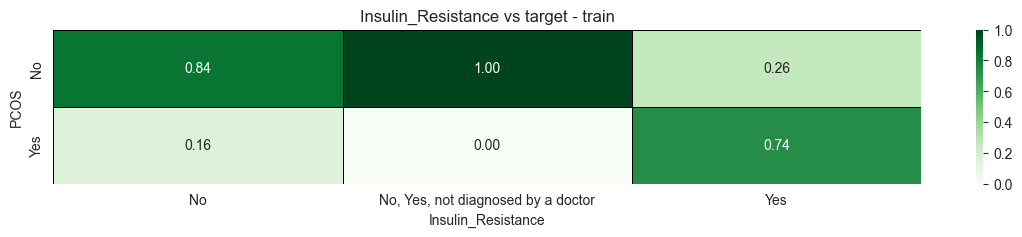

>>> Feature: Exercise_Frequency


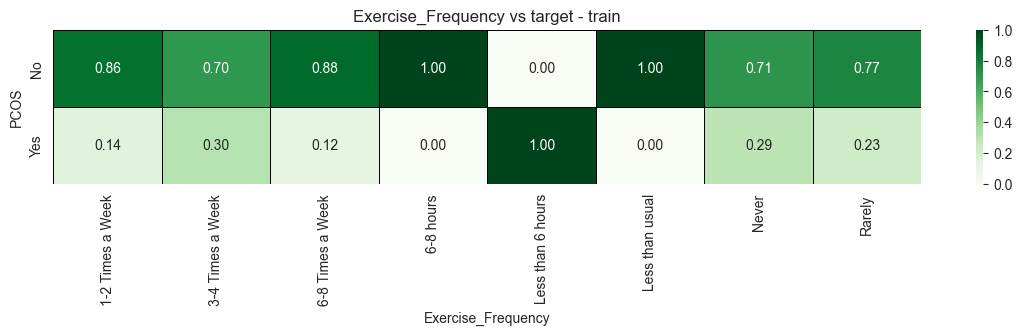

>>> Feature: Exercise_Duration


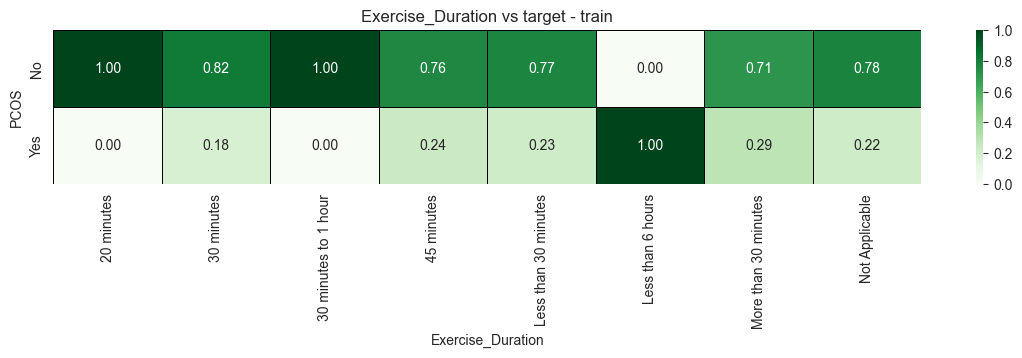

>>> Feature: Sleep_Hours


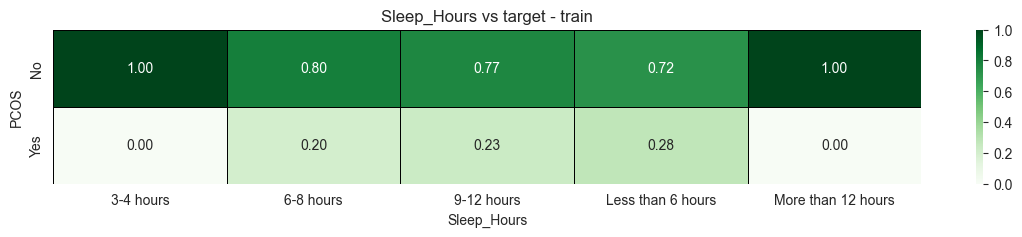

>>> Feature: Exercise_Benefit


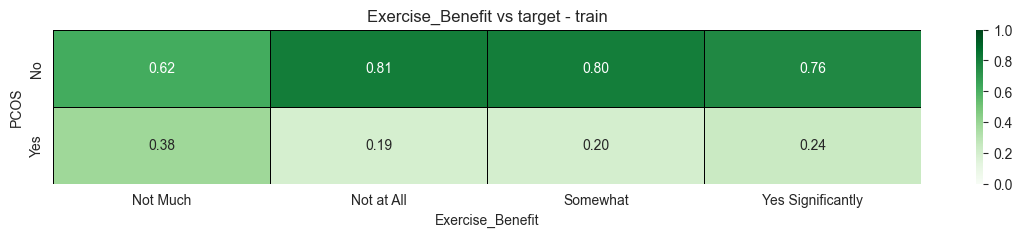

>>> Feature: Age_Group


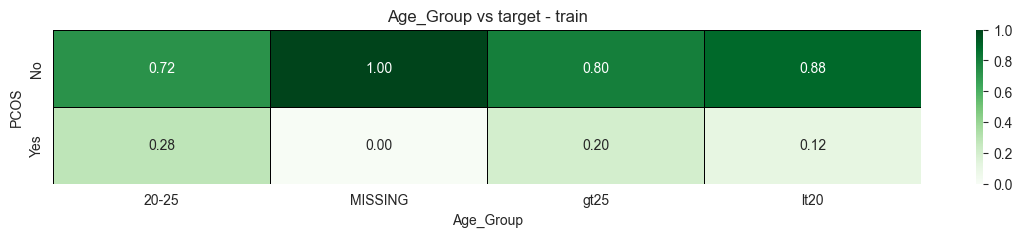

>>> Feature: Exercise_Type_Clean


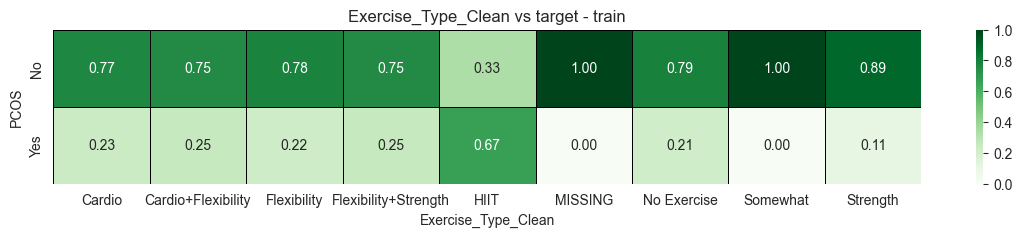

In [37]:
# impact of categorical features - normalized cross tables
for f in features_cat:
    print('>>> Feature:', f)
    ctab = pd.crosstab(df_train[target], df_train[f])
    ctab_norm = ctab / ctab.sum()
    plt.figure(figsize=(14,2))
    g = sns.heatmap(ctab_norm, annot=True,
                    fmt='.2f', linecolor='black',
                    linewidths=0.5, cmap='Greens', 
                    vmin=0, vmax=+1)
    plt.title(f + ' vs target - train')
    plt.show()

<a id='model'></a>
# Baseline Model

In [38]:
# predictors
predictors = features_num + features_cat
print(predictors)

['Weight_kg', 'Hormonal_Imbalance', 'Hyperandrogenism', 'Hirsutism', 'Conception_Difficulty', 'Insulin_Resistance', 'Exercise_Frequency', 'Exercise_Duration', 'Sleep_Hours', 'Exercise_Benefit', 'Age_Group', 'Exercise_Type_Clean']


In [39]:
# start H2O
h2o.init(max_mem_size='16G', nthreads=4)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.421-b09, mixed mode)
  Starting server from F:\ICBT_BSCE\ASSIGNMENTS\Computational_Intelligence\PCOSPrediction\PCOS-Project\.venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Admin\AppData\Local\Temp\tmpjtr9ci8k
  JVM stdout: C:\Users\Admin\AppData\Local\Temp\tmpjtr9ci8k\h2o_Admin_started_from_python.out
  JVM stderr: C:\Users\Admin\AppData\Local\Temp\tmpjtr9ci8k\h2o_Admin_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Colombo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,3 months and 16 days
H2O_cluster_name:,H2O_from_python_Admin_bo7czu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,14.20 Gb
H2O_cluster_total_cores:,28
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [40]:
# upload data in H2O environment
t1 = time.time()
train_hex = h2o.H2OFrame(df_train)
test_hex = h2o.H2OFrame(df_test)
t2 = time.time()
print('Elapsed time [s]:', np.round(t2-t1,4))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Elapsed time [s]: 0.6258


In [41]:
# force categorical target
train_hex[target] = train_hex[target].asfactor()

In [42]:
# define GBM
n_cv = 7
gbm_model = H2OGradientBoostingEstimator(nfolds = n_cv,
                                         ntrees = 50,
                                         learn_rate = 0.1,
                                         max_depth = 4,
                                         min_rows = 5,
                                         col_sample_rate = 0.75,
                                         score_each_iteration = True,
                                         stopping_rounds = 5,
                                         stopping_metric = 'auc',                                        
                                         seed = my_random_seed)

In [43]:
# train model
t1 = time.time()
gbm_model.train(predictors, target, training_frame = train_hex)
t2 = time.time()
print('Elapsed time [s]:', np.round(t2-t1,2))

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Elapsed time [s]: 0.72


In [44]:
# cross validation metrics
gbm_model.cross_validation_metrics_summary()

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid
accuracy,0.8763964,0.0799132,0.9230769,0.8888889,0.7,0.90625,0.9032258,0.9333333,0.88
aic,nan,0.0,nan,nan,nan,nan,nan,nan,nan
auc,0.8304232,0.0527828,0.9248366,0.8166667,0.7857143,0.8461539,0.8307692,0.7596154,0.8492063
err,0.1236036,0.0799132,0.0769231,0.1111111,0.3,0.09375,0.0967742,0.0666667,0.12
err_count,3.7142856,2.4299717,2.0,4.0,9.0,3.0,3.0,2.0,3.0
f0point5,0.7556225,0.1115742,0.8888889,0.6666667,0.5555556,0.7692308,0.7692308,0.8333333,0.8064516
f1,0.7081173,0.1005140,0.8888889,0.6666667,0.6666667,0.7272728,0.5714286,0.6666667,0.7692308
f2,0.6891342,0.1506686,0.8888889,0.6666667,0.8333333,0.6896552,0.4545455,0.5555556,0.7352941
lift_top_group,4.1181407,2.470923,2.8888888,0.0,3.3333333,5.3333335,6.2,7.5,3.5714285
loglikelihood,nan,0.0,nan,nan,nan,nan,nan,nan,nan


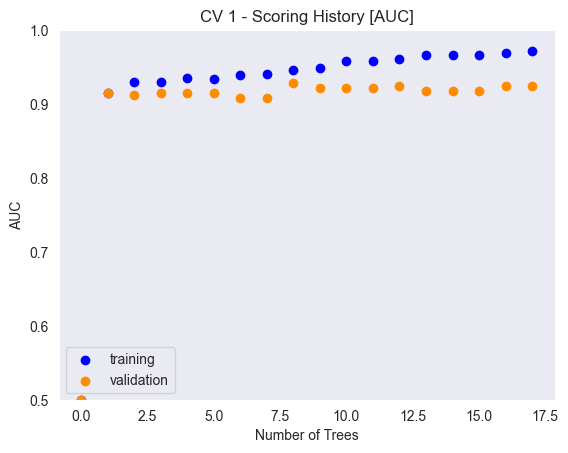

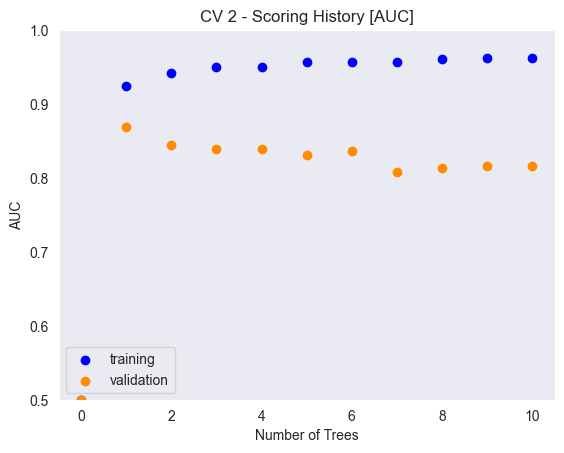

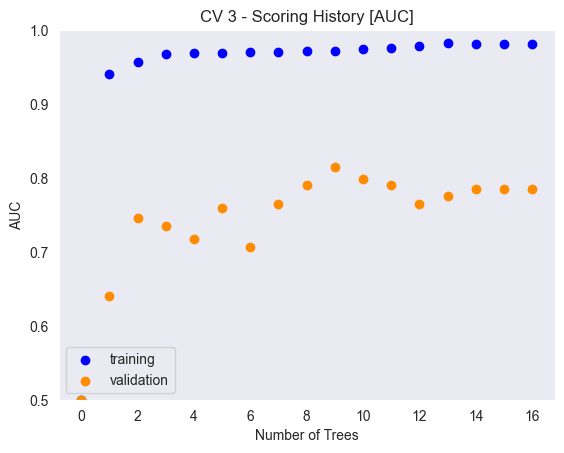

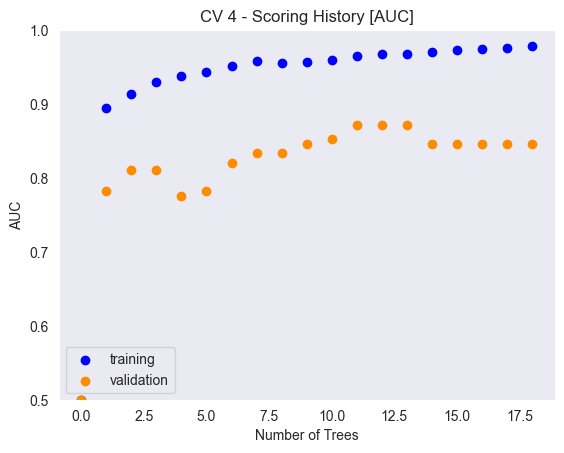

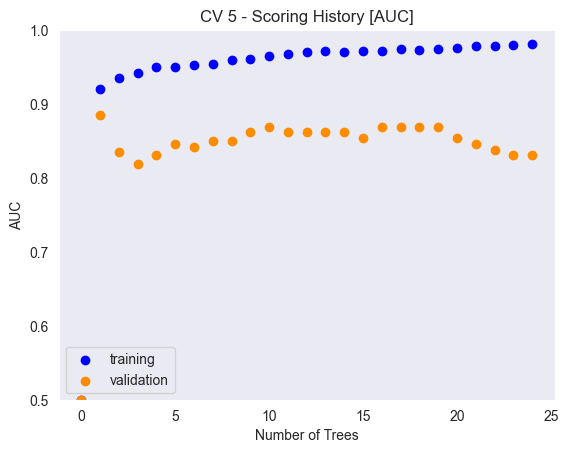

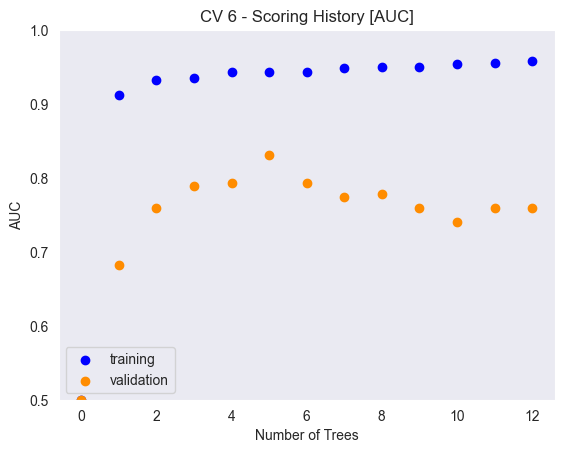

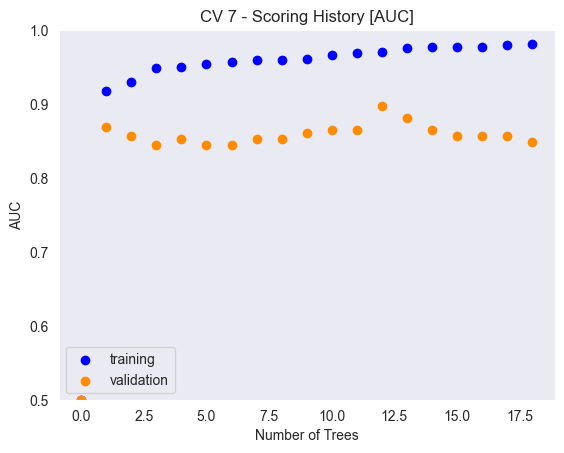

In [45]:
# show scoring history - training vs cross validations
for i in range(n_cv):
    cv_model_temp = gbm_model.cross_validation_models()[i]
    df_cv_score_history = cv_model_temp.score_history()
    my_title = 'CV ' + str(1+i) + ' - Scoring History [AUC]'
    plt.scatter(df_cv_score_history.number_of_trees,
                y=df_cv_score_history.training_auc, 
                c='blue', label='training')
    plt.scatter(df_cv_score_history.number_of_trees,
                y=df_cv_score_history.validation_auc, 
                c='darkorange', label='validation')
    plt.title(my_title)
    plt.xlabel('Number of Trees')
    plt.ylabel('AUC')
    plt.ylim(0.5,1.0)
    plt.legend()
    plt.grid()
    plt.show()

In [46]:
# model details
gbm_model.summary()

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,14.0,14.0,2606.0,4.0,4.0,4.0,8.0,12.0,10.214286


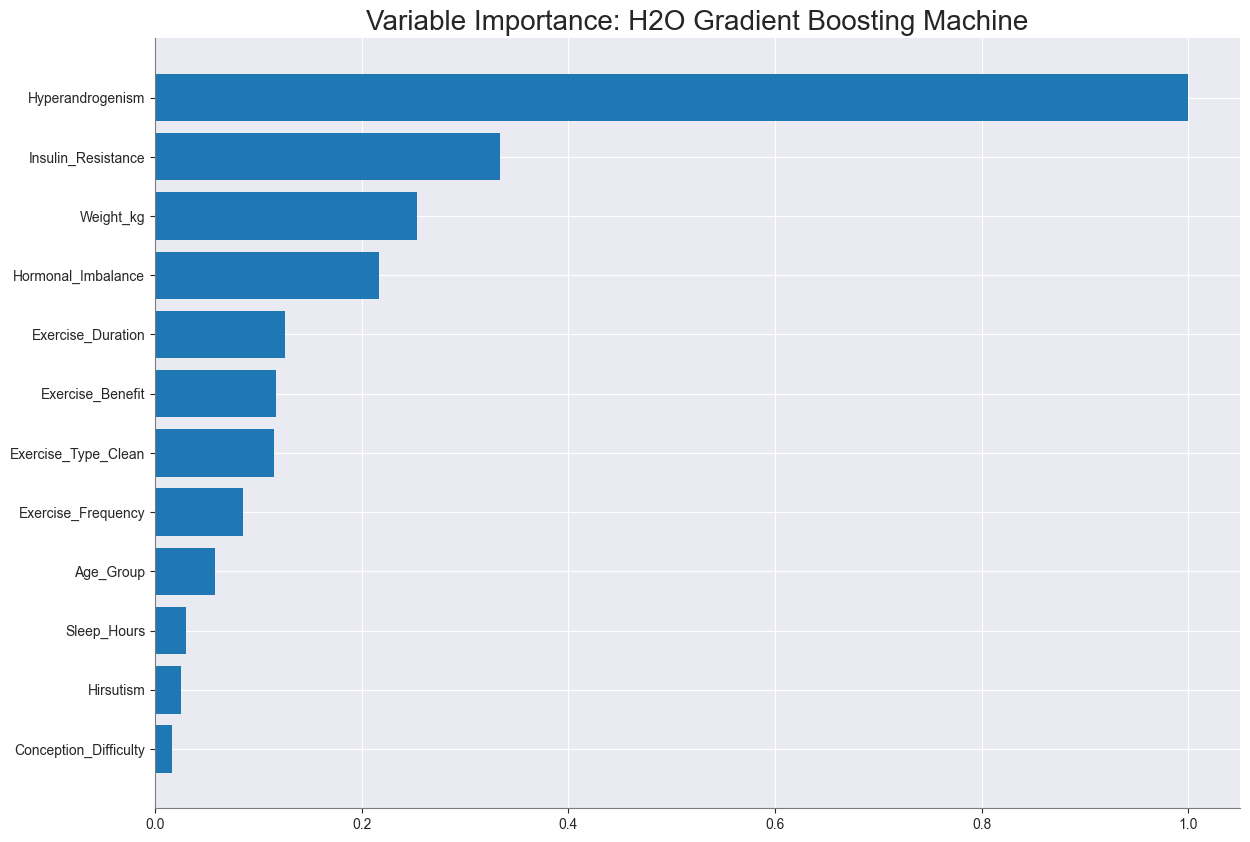

<Figure size 640x480 with 0 Axes>

In [47]:
# variable importance
gbm_model.varimp_plot(20)
plt.show()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


F:\ICBT_BSCE\ASSIGNMENTS\Computational_Intelligence\PCOSPrediction\PCOS-Project\.venv\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


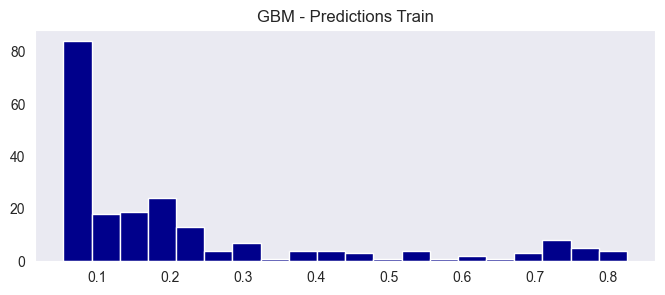

In [48]:
# predict on train set (extract probabilities only)
pred_train_GBM = gbm_model.predict(train_hex)['Yes']
pred_train_GBM = pred_train_GBM.as_data_frame().Yes

# plot train set predictions (probabilities)
plt.figure(figsize=(8,3))
plt.hist(pred_train_GBM, bins=20, color=default_color_1)
plt.title('GBM - Predictions Train')
plt.grid()
plt.show()

In [49]:
# check calibration
n_actual = df_train[target].value_counts()['Yes']
n_pred_GBM = sum(pred_train_GBM)

print('Actual Frequency    :', n_actual)
print('Predicted Frequency :', n_pred_GBM)
print('Calibration Ratio   :', n_pred_GBM / n_actual)

Actual Frequency    : 46
Predicted Frequency : 46.42660179268243
Calibration Ratio   : 1.0092739520148355


In [50]:
# predict on test set
pred_test = gbm_model.predict(test_hex).as_data_frame()
df_test['pred_GBM'] = pred_test.Yes
df_test['pred_GBM_binary'] = pred_test.predict

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


F:\ICBT_BSCE\ASSIGNMENTS\Computational_Intelligence\PCOSPrediction\PCOS-Project\.venv\lib\site-packages\h2o\job.py:81: UserWarning: Test/Validation dataset column 'Conception_Difficulty' has levels not trained on: ["Somewhat"]
  warnings.warn(w)
F:\ICBT_BSCE\ASSIGNMENTS\Computational_Intelligence\PCOSPrediction\PCOS-Project\.venv\lib\site-packages\h2o\job.py:81: UserWarning: Test/Validation dataset column 'Insulin_Resistance' has levels not trained on: ["Yes Significantly"]
  warnings.warn(w)
F:\ICBT_BSCE\ASSIGNMENTS\Computational_Intelligence\PCOSPrediction\PCOS-Project\.venv\lib\site-packages\h2o\job.py:81: UserWarning: Test/Validation dataset column 'Exercise_Frequency' has levels not trained on: ["1/2 Times a Week", "30-35", "Daily", "Less than 6-8 Times a Week", "Somewhat"]
  warnings.warn(w)
F:\ICBT_BSCE\ASSIGNMENTS\Computational_Intelligence\PCOSPrediction\PCOS-Project\.venv\lib\site-packages\h2o\job.py:81: UserWarning: Test/Validation dataset column 'Exercise_Duration' has leve

In [51]:
# basic stats
df_test.pred_GBM.describe()

count    145.000000
mean       0.202626
std        0.162781
min        0.056356
25%        0.077275
50%        0.157458
75%        0.239236
max        0.767103
Name: pred_GBM, dtype: float64

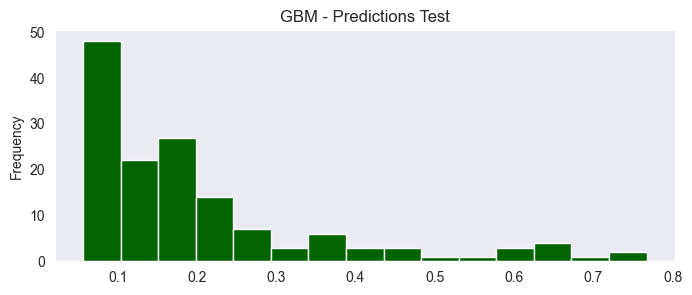

In [52]:
# plot predictions
plt.figure(figsize=(8,3))
df_test.pred_GBM.plot(kind='hist', bins=15,
                      color=default_color_2)
plt.title('GBM - Predictions Test')
plt.grid()
plt.show()

In [53]:
# create submission file
df_sub_GBM = df_sub.copy()
df_sub_GBM[target] = df_test.pred_GBM
df_sub_GBM.to_csv('submission_GBM.csv', index=False)
df_sub_GBM.head(10)

,ID,PCOS
0,0,0.067541
1,1,0.239236
2,2,0.205809
3,3,0.354853
4,4,0.177256
5,5,0.279610
6,6,0.067541
7,7,0.239236
8,8,0.561160
9,9,0.067574


<a id='linear'></a>
# Linear Model

In [54]:
# setup GLM
# taking over n_cv from first model...
glm_model = H2OGeneralizedLinearEstimator(nfolds = n_cv,                                        
                                          score_each_iteration = True,
                                          seed = my_random_seed)

In [55]:
# train model
t1 = time.time()
glm_model.train(predictors, target, training_frame = train_hex)
t2 = time.time()
print('Elapsed time [s]:', np.round(t2-t1,4))

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Elapsed time [s]: 0.2561


In [56]:
# cross validation metrics
glm_model.cross_validation_metrics_summary()

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid
accuracy,0.8707234,0.0777613,0.8846154,0.8055556,0.7333333,0.875,0.9032258,0.9333333,0.96
aic,49.63327,7.0550804,51.30103,58.374096,58.851955,47.677406,47.328636,40.043076,43.8567
auc,0.8649647,0.0753949,0.9281046,0.7444444,0.8412698,0.8397436,0.8307692,0.8942308,0.9761905
err,0.1292766,0.0777613,0.1153846,0.1944444,0.2666667,0.125,0.0967742,0.0666667,0.04
err_count,4.0,2.5819888,3.0,7.0,8.0,4.0,3.0,2.0,1.0
f0point5,0.7260801,0.1437664,0.8163266,0.5,0.5844156,0.6818182,0.7692308,0.8333333,0.8974359
f1,0.6991538,0.1383387,0.8421053,0.5882353,0.6923077,0.6,0.5714286,0.6666667,0.9333333
f2,0.7072779,0.1970662,0.8695652,0.7142857,0.8490566,0.5357143,0.4545455,0.5555556,0.9722222
lift_top_group,4.1181407,2.470923,2.8888888,0.0,3.3333333,5.3333335,6.2,7.5,3.5714285
loglikelihood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# model details
glm_model

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1739909076926_269


GLM Model: summary
    family    link    regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.01618 )  64                            13                             6                       py_1_sid_aa33

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.09802058865640298
RMSE: 0.31308239914821623
LogLoss: 0.328505285770674
AUC: 0.8939554612937434
AUCPR: 0.7610567732927047
Gini: 0.7879109225874867
Null degrees of freedom: 209
Residual degrees of freedom: 196
Null deviance: 220.793966098003
Residual deviance: 137.97222002368306
AIC: 165.97222002368306

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2748995429278991
       No    Yes    Error    Rate
-----  ----  -----  -------  ------------
No     150   14     0.0854   (14.0/164.0)
Yes    11    35     0.2391   (11.0/46.0)
Total  161   49     0.119    (25.0/210.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.2749       0.736842  48
max f2                       0.178605     0.759259  84
max f0point5                 0.567859     0.787671  24
max accuracy                 0.567859     0.880952  24
max precision                0.911234     1         0
max recall                   0.0315959    1         195
max specificity              0.911234     1         0
max absolute_mcc             0.2749       0.660568  48
max min_per_class_accuracy   0.210764     0.79878   69
max mean_per_class_accuracy  0.2749       0.837752  48
max tns                      0.911234     164       0
max fns                      0.911234     45        0
max fps                      0.0286469    164       197
max tps                      0.0315959    46        195
max tnr                      0.911234     1         0
max fnr                      0.911234     0.978261  0
max fpr                      0.0286469    1         197
max tpr                      0.0315959    1         195

Gains/Lift Table: Avg response rate: 21.90 %, avg score: 21.90 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0142857                   0.849315           4.56522   4.56522            1                0.871896   1                           0.871896            0.0652174       0.0652174                  356.522   356.522            0.0652174
2        0.0238095                   0.826104           4.56522   4.56522            1                0.832012   1                           0.855942            0.0434783       0.108696                   356.522   356.522            0.108696
3        0.0333333                   0.79392            2.28261   3.91304            0.5              0.807912   0.857143                    0.842219            0.0217391       0.130435                   128.261   291.304            0.124337
4        0.0428571                   0.756343           4.56522   4.05797            1                0.758799   0.888889                    0.823682            0.0434783       0.173913                   356.522   305.797        

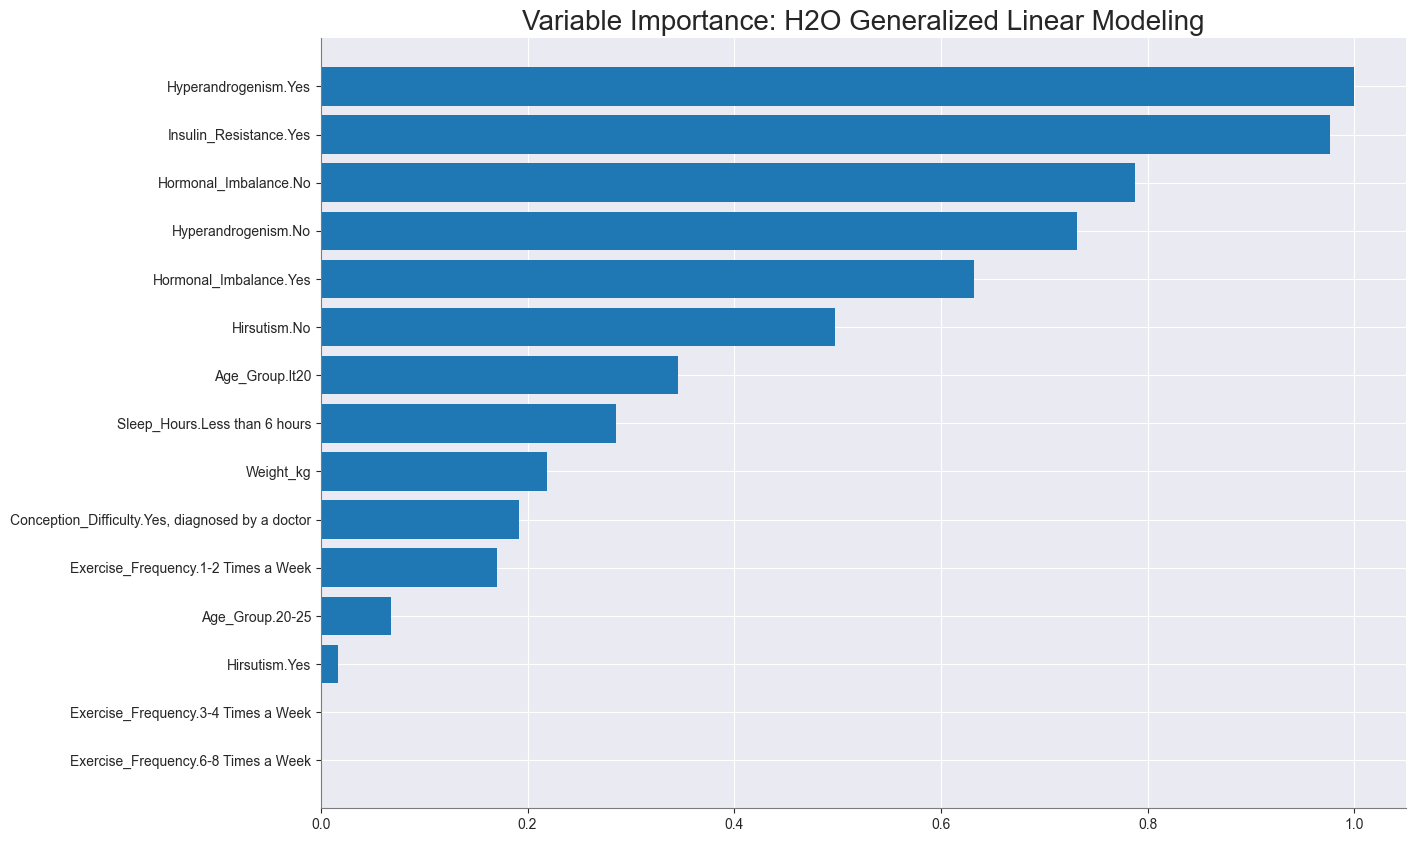

<Figure size 640x480 with 0 Axes>

In [58]:
# variable importance
glm_model.varimp_plot(15)
plt.show()

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


F:\ICBT_BSCE\ASSIGNMENTS\Computational_Intelligence\PCOSPrediction\PCOS-Project\.venv\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


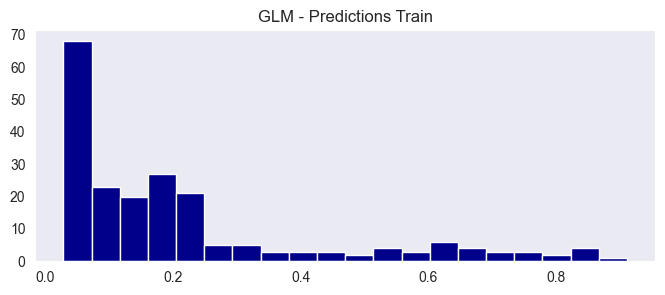

In [59]:
# predict on train set (extract probabilities only)
pred_train_GLM = glm_model.predict(train_hex)['Yes']
pred_train_GLM = pred_train_GLM.as_data_frame().Yes

# plot train set predictions (probabilities)
plt.figure(figsize=(8,3))
plt.hist(pred_train_GLM, bins=20, color=default_color_1)
plt.title('GLM - Predictions Train')
plt.grid()
plt.show()

In [60]:
# check calibration
n_actual = df_train[target].value_counts()['Yes']
n_pred_GLM = sum(pred_train_GLM)

print('Actual Frequency    :', n_actual)
print('Predicted Frequency :', n_pred_GLM)
print('Calibration Ratio   :', n_pred_GLM / n_actual)

Actual Frequency    : 46
Predicted Frequency : 46.000195780093875
Calibration Ratio   : 1.0000042560889972


In [61]:
# predict on test set
pred_test = glm_model.predict(test_hex).as_data_frame()
df_test['pred_GLM'] = pred_test.Yes
df_test['pred_GLM_binary'] = pred_test.predict

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


F:\ICBT_BSCE\ASSIGNMENTS\Computational_Intelligence\PCOSPrediction\PCOS-Project\.venv\lib\site-packages\h2o\job.py:81: UserWarning: Test/Validation dataset column 'Exercise_Frequency' has levels not trained on: ["1/2 Times a Week", "30-35", "Daily", "Less than 6-8 Times a Week", "Somewhat"]
  warnings.warn(w)
F:\ICBT_BSCE\ASSIGNMENTS\Computational_Intelligence\PCOSPrediction\PCOS-Project\.venv\lib\site-packages\h2o\job.py:81: UserWarning: Test/Validation dataset column 'Exercise_Duration' has levels not trained on: ["1-2 Times a Week", "3-4 Times a Week", "40 minutes", "6-8 hours", "Less than 20 minutes", "Not Much"]
  warnings.warn(w)
F:\ICBT_BSCE\ASSIGNMENTS\Computational_Intelligence\PCOSPrediction\PCOS-Project\.venv\lib\site-packages\h2o\job.py:81: UserWarning: Test/Validation dataset column 'Exercise_Type_Clean' has levels not trained on: ["Other"]
  warnings.warn(w)
F:\ICBT_BSCE\ASSIGNMENTS\Computational_Intelligence\PCOSPrediction\PCOS-Project\.venv\lib\site-packages\h2o\job.py:

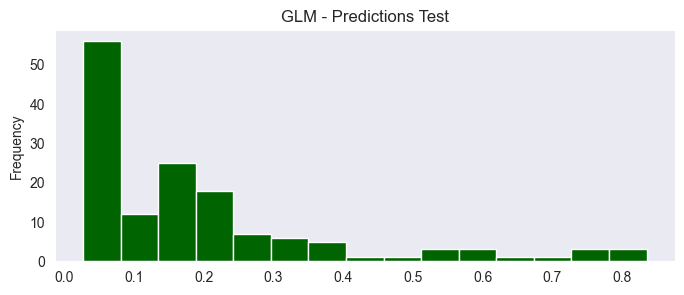

In [62]:
# plot predictions
plt.figure(figsize=(8,3))
df_test.pred_GLM.plot(kind='hist', bins=15,
                      color=default_color_2)
plt.title('GLM - Predictions Test')
plt.grid()
plt.show()

In [63]:
# create submission file
df_sub_GLM = df_sub.copy()
df_sub_GLM[target] = df_test.pred_GLM
df_sub_GLM.to_csv('submission_GLM.csv', index=False)
df_sub_GLM.head(10)

,ID,PCOS
0,0,0.058736
1,1,0.210501
2,2,0.207906
3,3,0.383115
4,4,0.103676
5,5,0.354780
6,6,0.060495
7,7,0.155131
8,8,0.391448
9,9,0.064576


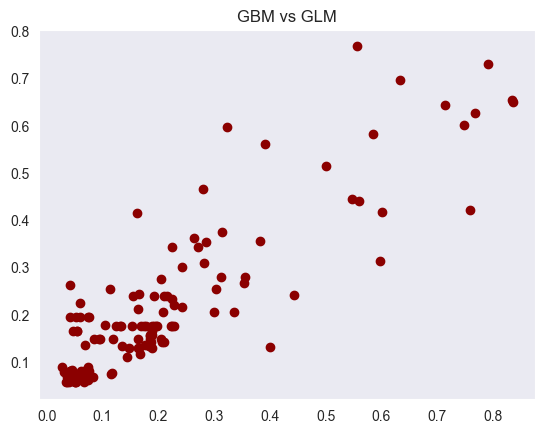

In [64]:
# compare GLM and GBM predictions
plt.scatter(df_test.pred_GLM, df_test.pred_GBM,
            color=default_color_3)
plt.title('GBM vs GLM')
plt.grid()
plt.show()